<a href="https://colab.research.google.com/github/AkhMutholib/DataMining/blob/main/naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
dataset = pd.read_csv("Data-2.csv")
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [19]:
print(x)

[[    19  10000]
 [    35  20000]
 [    20  40000]
 [    27  50000]
 [    19  70000]
 [    27  50000]
 [    27  80000]
 [    32 150000]
 [    25  30000]
 [    22 150000]]


In [20]:
print(y)

[0 1 0 1 0 0 0 1 0 1]


In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [22]:
print(x_train)

[[    22 150000]
 [    35  20000]
 [    27  80000]
 [    32 150000]
 [    27  50000]
 [    19  10000]
 [    27  50000]]


In [23]:
print(x_test)

[[   20 40000]
 [   25 30000]
 [   19 70000]]


In [24]:
print(y_train)

[1 1 0 1 1 0 0]


In [25]:
print(y_test)

[0 0 0]


In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [27]:
print(x_train)

[[-0.99153722  1.45257892]
 [ 1.58645956 -0.99528556]
 [ 0.          0.13449805]
 [ 0.99153722  1.45257892]
 [ 0.         -0.43039376]
 [-1.58645956 -1.18358283]
 [ 0.         -0.43039376]]


In [28]:
print(x_test)

[[-1.38815211 -0.61869102]
 [-0.39661489 -0.80698829]
 [-1.58645956 -0.05379922]]


In [29]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [31]:
y_pred = classifier.predict(x_test)

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


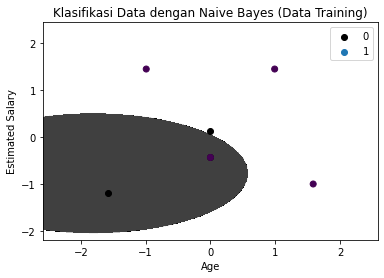

In [33]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 1].max() + 1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('black', 'white')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('black', 'white'))(i), label = j)
plt.title('Klasifikasi Data dengan Naive Bayes (Data Training)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


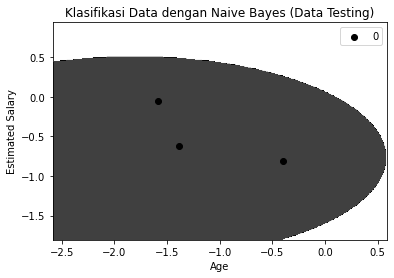

In [34]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 1].max() + 1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('black', 'white')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('black', 'white'))(i), label = j)
plt.title('Klasifikasi Data dengan Naive Bayes (Data Testing)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()